# Health and Diabetes EDA

This is a mini-project with the goal of showcasing my EDA skills.

<hr style="height:5px; border:none; background-color:black;" />

# The Problem

We have health information from the Pima Indians Diabetes Dataset.  We'd like to get a picture of the relationship between diabetes diagnosis and the other health factors in our dataset.

Here are specific questions we want to answer:
1. What are the average health metrics for diabetics and non-diabetics?
2. What is the correlation between diabetes diagnosis and the other factors?
3. Which factors seem to be correlated with one another?
4. What is the basic relationship between other health factors and diabetes?

**Bonus: Use ML to predict if a person has diabetes**

# Summary
Blood Glucose is the big differentiator between diabetics and non-diabetics.

We investigated the health factor difference between women who had been diagnosec with diabetes and women who had not by comparing the averages between the two groups, looking for correlation in the dataset, and by making graphs to visualize the relationship between variables.

Nearly all of the health factors have double-digit percent differences between the two groups, with the exception of blood pressure and the ratio of glucose to insulin. Glucose had the highest correlation with diabetes diagnosis, followed by BMI and Age. Insulin, BMI, and Skin Thickness were correlated with each other as well. From the visualizations, the only factor that seemed very different between the two groups was blood glucose. Therefore, we conclude that blood glucose is the big differentiator between diabetics and non-diabetics.

This information is important for personal health management. It tells us that we can limit our likelihood of diabetes by keeping our blood sugar low even if we still struggle with BMI, even if we have lots of kids, and even if diabetes runs in our family.

### Import Packages and Load the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "https://raw.githubusercontent.com/Faduzzle/data/refs/heads/main/business/diabetes_data.csv"
Data = pd.read_csv(data_path)

### Inspect the data properties

In [3]:
Data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### The values seem to be the correct data types. Let's get to understanding the columns
## Features

- **Pregnancies**  
  *Description:* The number of times the patient has been pregnant.  
  *Type:* Integer  
  *Note:* Higher counts may be associated with increased risk in certain contexts.

- **Glucose**  
  *Description:* Plasma glucose concentration measured 2 hours after ingesting a glucose solution (mg/dL).  
  *Type:* Continuous  
  *Note:* Zero values are physiologically unlikely and may indicate missing data.

- **BloodPressure**  
  *Description:* Diastolic blood pressure (mm Hg).  
  *Type:* Continuous  
  *Note:* As with glucose, a value of zero may signal missing or unrecorded data.

- **SkinThickness**  
  *Description:* Triceps skinfold thickness (mm), an indicator of body fat.  
  *Type:* Continuous  
  *Note:* Values typically range between realistic human measurements; zeros may indicate missing data.

- **Insulin**  
  *Description:* Serum insulin level (µIU/mL).  
  *Type:* Continuous  
  *Note:* High variability is observed, and zero values often denote missing or invalid measurements.

- **BMI**  
  *Description:* Body mass index, calculated as weight (kg) divided by height (m) squared.  
  *Type:* Continuous  
  *Note:* Provides an estimate of body fat and overall health.

- **DiabetesPedigreeFunction**  
  *Description:* A function that scores the likelihood of diabetes based on family history and genetic factors.  
  *Type:* Continuous  
  *Note:* Higher values indicate a stronger family history of diabetes.

- **Age**  
  *Description:* The age of the patient (years).  
  *Type:* Continuous  
  *Note:* Age is a common risk factor in many health conditions, including diabetes.

- **Outcome**  
  *Description:* Class variable indicating the presence of diabetes.  
  *Type:* Binary (0 or 1)  
  *Note:* 1 indicates the patient is diabetic; 0 indicates non-diabetic.


In [5]:
Data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

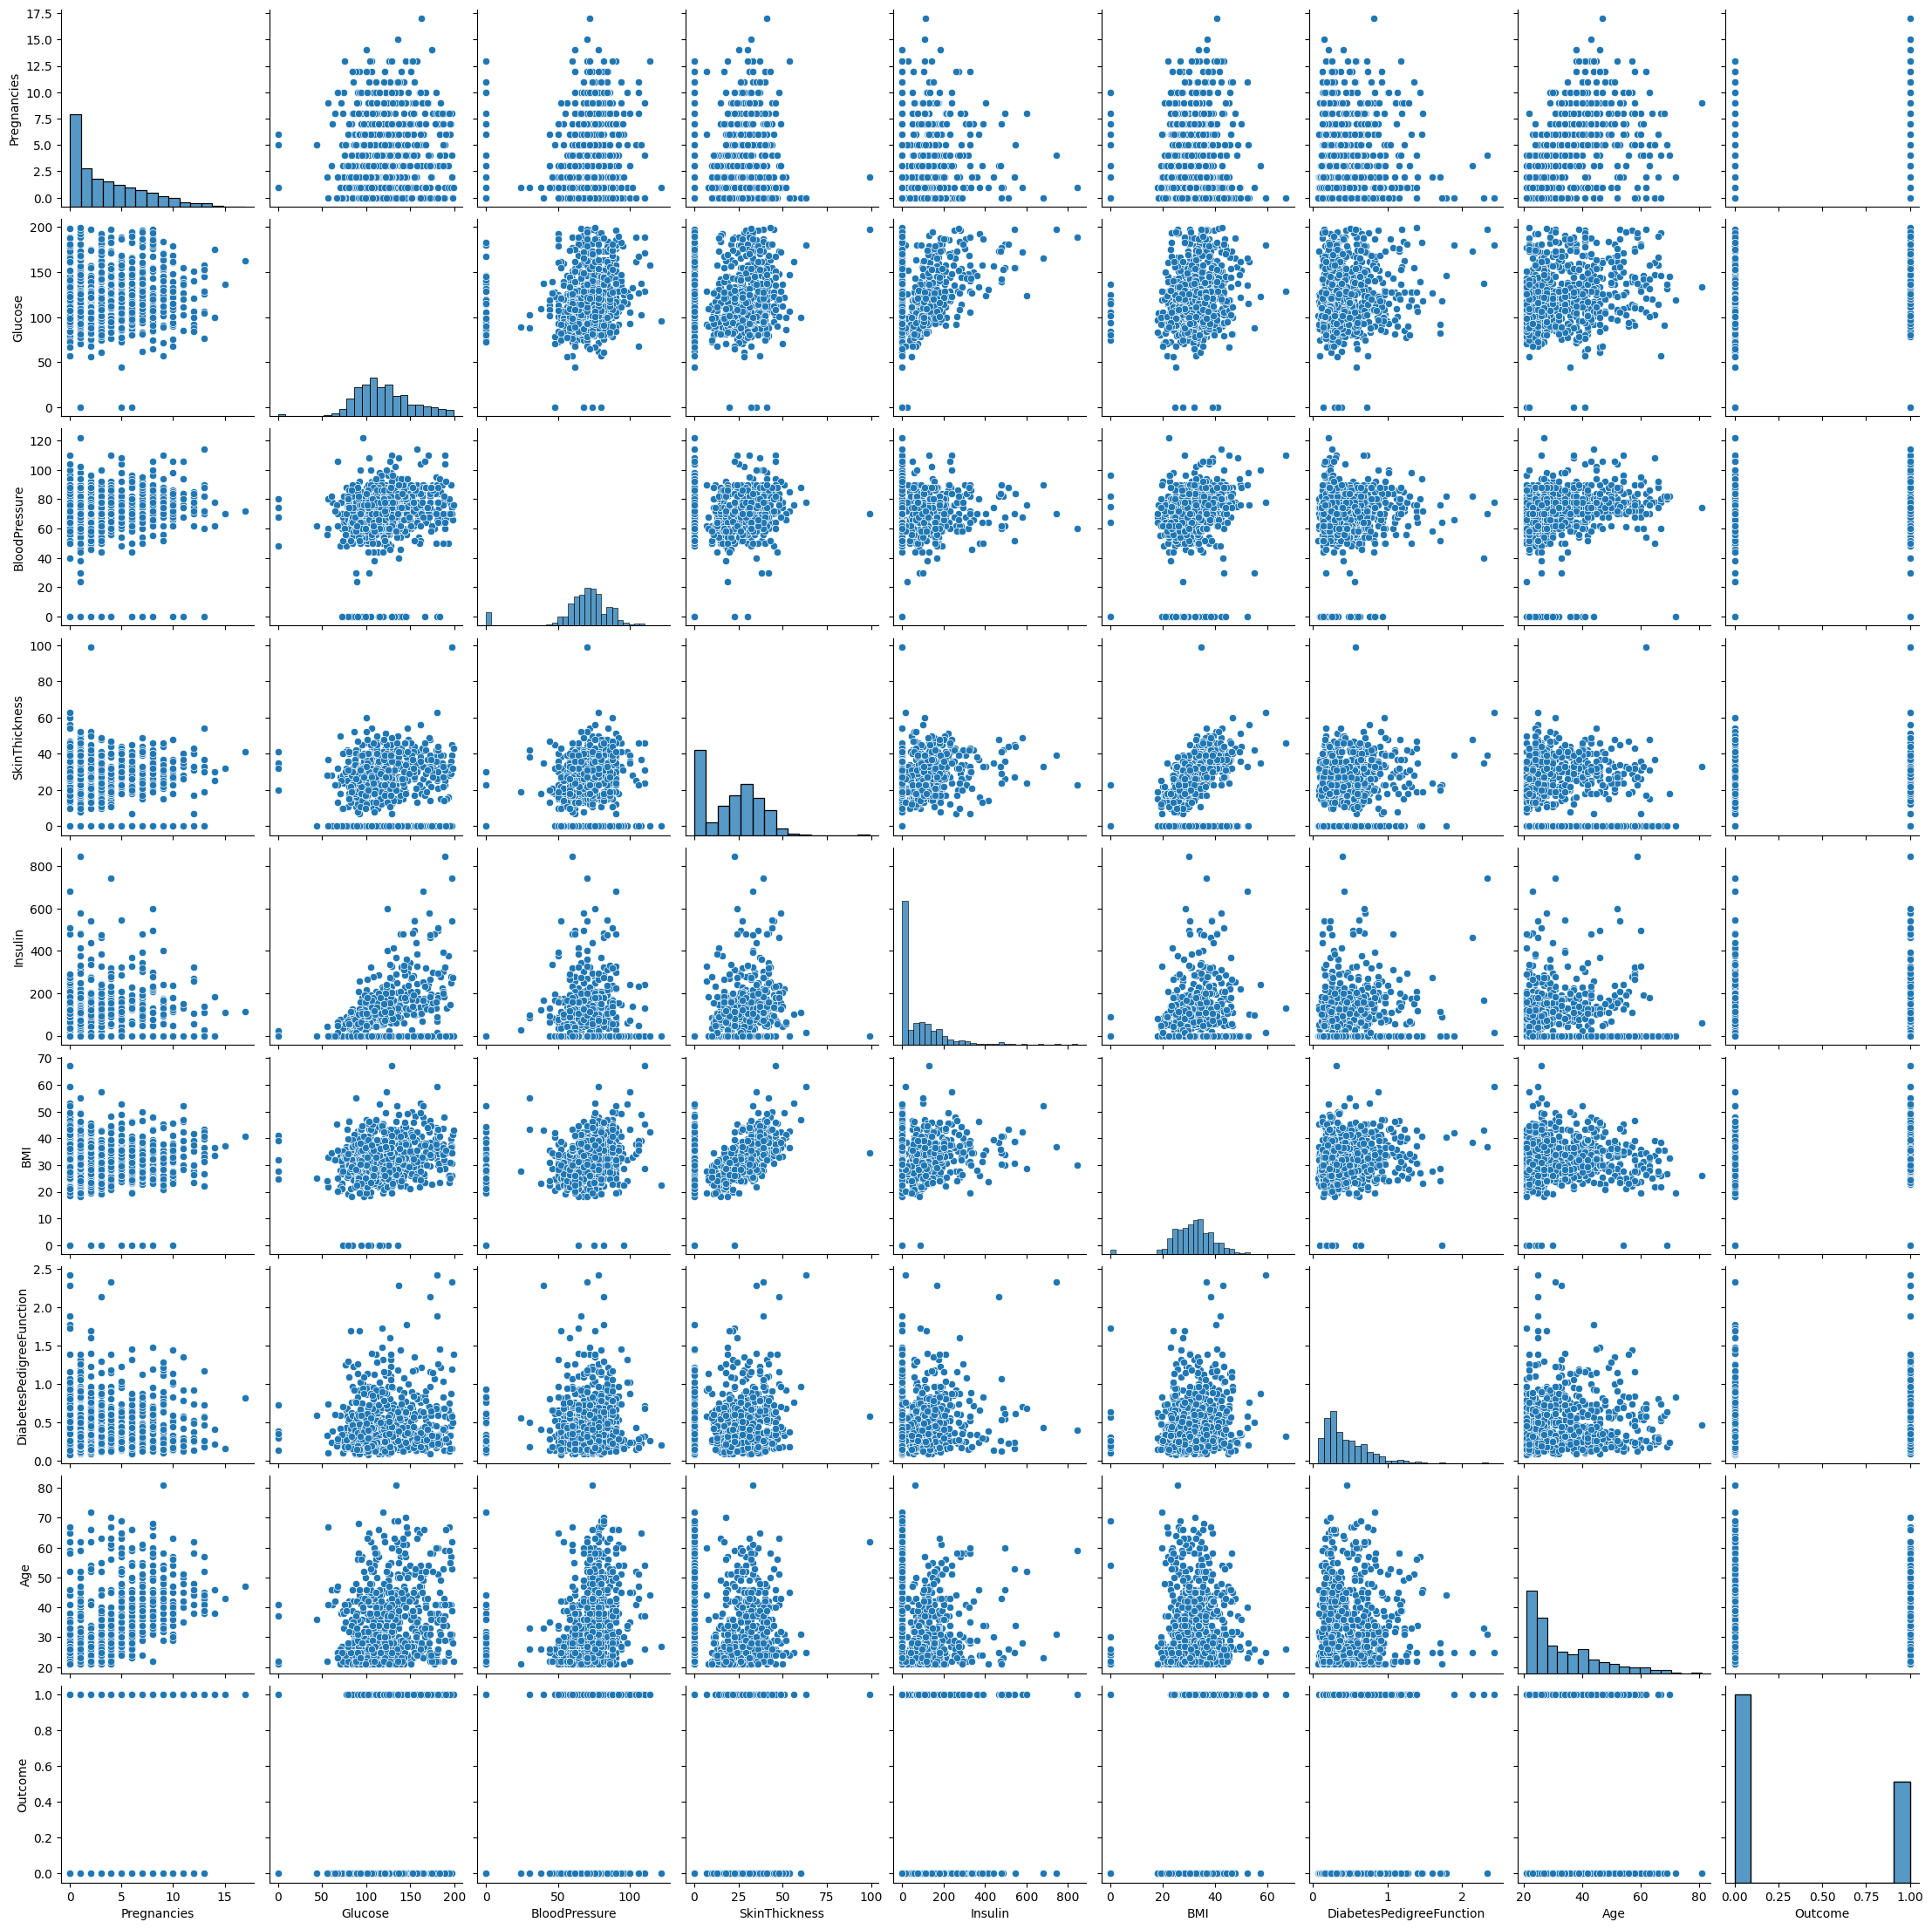

In [6]:
sns.pairplot(Data)
plt.show()

## Preprocessing the data
As noted earlier the data has some missing values and needs processing before we can derive any insights from it. 
Here I will "clean" the dataset to make it useable
- Changing column names to lowercase for preference
- dropping cells with missing values and outliers
- *Imputing Missing Data:*

    Using KNNImputer to impute missing data and outliers.

    To determine the best K I use the The Frobenius norm (a type of matrix norm) to measure the overall difference between two matrices. Here, it quantifies how much the imputed correlation matrix deviates from the original correlation matrix.

    I choose K=3 to avoid overfitting and oversmoothing the data. 

I will begin with renaming the column names to make them easier to work with. 

In [7]:
# create a copy of the original dataset
data = Data.copy()
# make the column names all lower case
data = data.rename(columns=str.lower)
# change the name of the "outcome" column to "diabetes", so its meaning is more intuitive
data = data.rename(columns={'outcome': 'diabetes'})

*Dropping Erroneous Data*

By observing from the pair plots there seem to not be major outliers or outlier groups other than the recorded zeros in the dataset. I will drop these zeroes to impute later and for good measure do the same for eggregious outliers

In [8]:
# Define the columns where zeros are not valid.
cols_to_check = ['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi']

# Step 1: Replace zero values with NaN
data_clean = data.copy()
for col in cols_to_check:
    data_clean.loc[data_clean[col] == 0, col] = np.nan

# Step 2: Clear outliers by setting them to NaN using the IQR method.
def clear_outliers(df, columns, multiplier=1.5):
    df_out = df.copy()
    for col in columns:
        # Calculate Q1 and Q3 for the column
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        # Set values outside the IQR bounds to NaN
        df_out.loc[(df_out[col] < lower_bound) | (df_out[col] > upper_bound), col] = np.nan
    return df_out

data_clean = clear_outliers(data_clean, cols_to_check)

### *Imputing Missing Data*
Using KNNImputer to impute missing data and outliers.

To determine the best K I use the The Frobenius norm (a type of matrix norm) to measure the overall difference between two matrices. Here, it quantifies how much the imputed correlation matrix deviates from the original correlation matrix.

I choose K=3 to avoid overfitting and oversmoothing the data. 

k = 1: Frobenius norm difference = 0.8420
k = 2: Frobenius norm difference = 0.9383
k = 3: Frobenius norm difference = 1.0038
k = 5: Frobenius norm difference = 1.0245
k = 7: Frobenius norm difference = 1.0580
k = 9: Frobenius norm difference = 1.0716
k = 11: Frobenius norm difference = 1.0753

Frobenius norm differences by k: {1: 0.8419753340799183, 2: 0.938268220886301, 3: 1.0038483167610115, 5: 1.0245174105458104, 7: 1.058016851012144, 9: 1.0715677556230716, 11: 1.0752996234050902}
Best k based on the minimum difference: 1


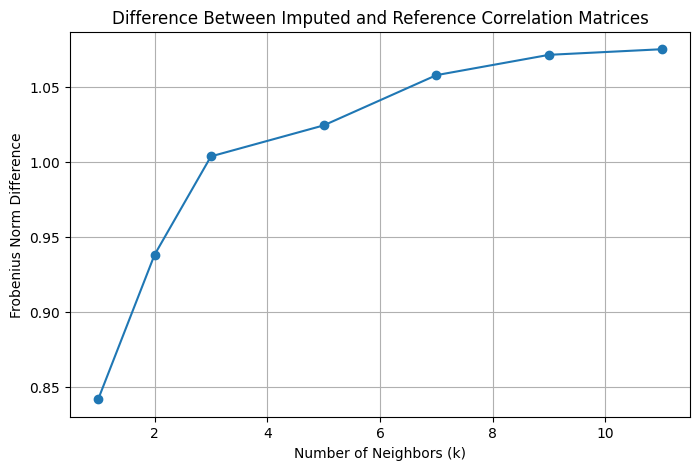

In [9]:
import seaborn as sns
from sklearn.impute import KNNImputer

# Define the columns to impute (e.g. columns with missing or problematic values)
cols_to_impute = ['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi']

# Define a list of candidate k values for the KNN imputer.
k_values = [1, 2, 3, 5, 7, 9, 11]

# Create a reference correlation matrix using complete cases for the imputation columns.
# (We use complete cases for all columns here to get a reference correlation matrix for the entire dataset.)
reference_data = data.dropna(subset=cols_to_impute)
reference_corr = reference_data.corr()

# Dictionaries to store the correlation matrices and the computed Frobenius norm differences.
corr_matrices = {}
frobenius_diffs = {}

for k in k_values:
    # Make a copy of the original dataset.
    data_imputed = data_clean.copy()
    
    # Create the KNN imputer for the selected k.
    imputer = KNNImputer(n_neighbors=k)
    
    # Impute only the specified columns.
    imputed_subset = pd.DataFrame(
        imputer.fit_transform(data_imputed[cols_to_impute]),
        columns=cols_to_impute,
        index=data_imputed.index
    )
    data_imputed[cols_to_impute] = imputed_subset
    
    # Compute the correlation matrix for the entire imputed dataset.
    corr_matrix = data_imputed.corr()
    corr_matrices[k] = corr_matrix
    
    # Compute the Frobenius norm difference between this correlation matrix and the reference.
    # (We use the .values attribute to work with the underlying numpy arrays.)
    diff = np.linalg.norm(corr_matrix.values - reference_corr.values, ord='fro')
    frobenius_diffs[k] = diff
    print(f"k = {k}: Frobenius norm difference = {diff:.4f}")

# Determine the best k as the one with the minimum Frobenius norm difference.
best_k = min(frobenius_diffs, key=frobenius_diffs.get)
print("\nFrobenius norm differences by k:", frobenius_diffs)
print(f"Best k based on the minimum difference: {best_k}")

# Plot the Frobenius norm differences for each k.
plt.figure(figsize=(8, 5))
plt.plot(list(frobenius_diffs.keys()), list(frobenius_diffs.values()), marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Frobenius Norm Difference")
plt.title("Difference Between Imputed and Reference Correlation Matrices")
plt.grid(True)
plt.show()

In [10]:
from sklearn.impute import KNNImputer

# Create an instance of the KNNImputer; you can adjust the number of neighbors (n_neighbors)
imputer = KNNImputer(n_neighbors=3)

# Fit the imputer on your data and transform it.
# The imputer returns a NumPy array, so we convert it back to a DataFrame and retain column names.
data_imputed = pd.DataFrame(imputer.fit_transform(data_clean), columns=data_clean.columns)

data_clean = data_imputed.copy()

data_clean.describe()

pregnancies     glucose  bloodpressure  skinthickness     insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.567274      72.098958      29.019531  134.716146   
std       3.369578   30.544858      11.057174       9.091120   65.482819   
min       0.000000   44.000000      40.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.583333   83.000000   
50%       3.000000  117.000000      72.000000      29.000000  128.666667   
75%       6.000000  141.000000      80.000000      35.666667  176.000000   
max      17.000000  199.000000     104.000000      56.000000  360.000000   

              bmi  diabetespedigreefunction         age    diabetes  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.174826                  0.471876   33.240885    0.348958  
std      6.438993                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.483333                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.425000                  0.626250   41.000000    1.000000  
max     50.000000                  2.420000   81.000000    1.000000

Hopefully this cleaned dataset is representative of the population

## Cleaned Dataset

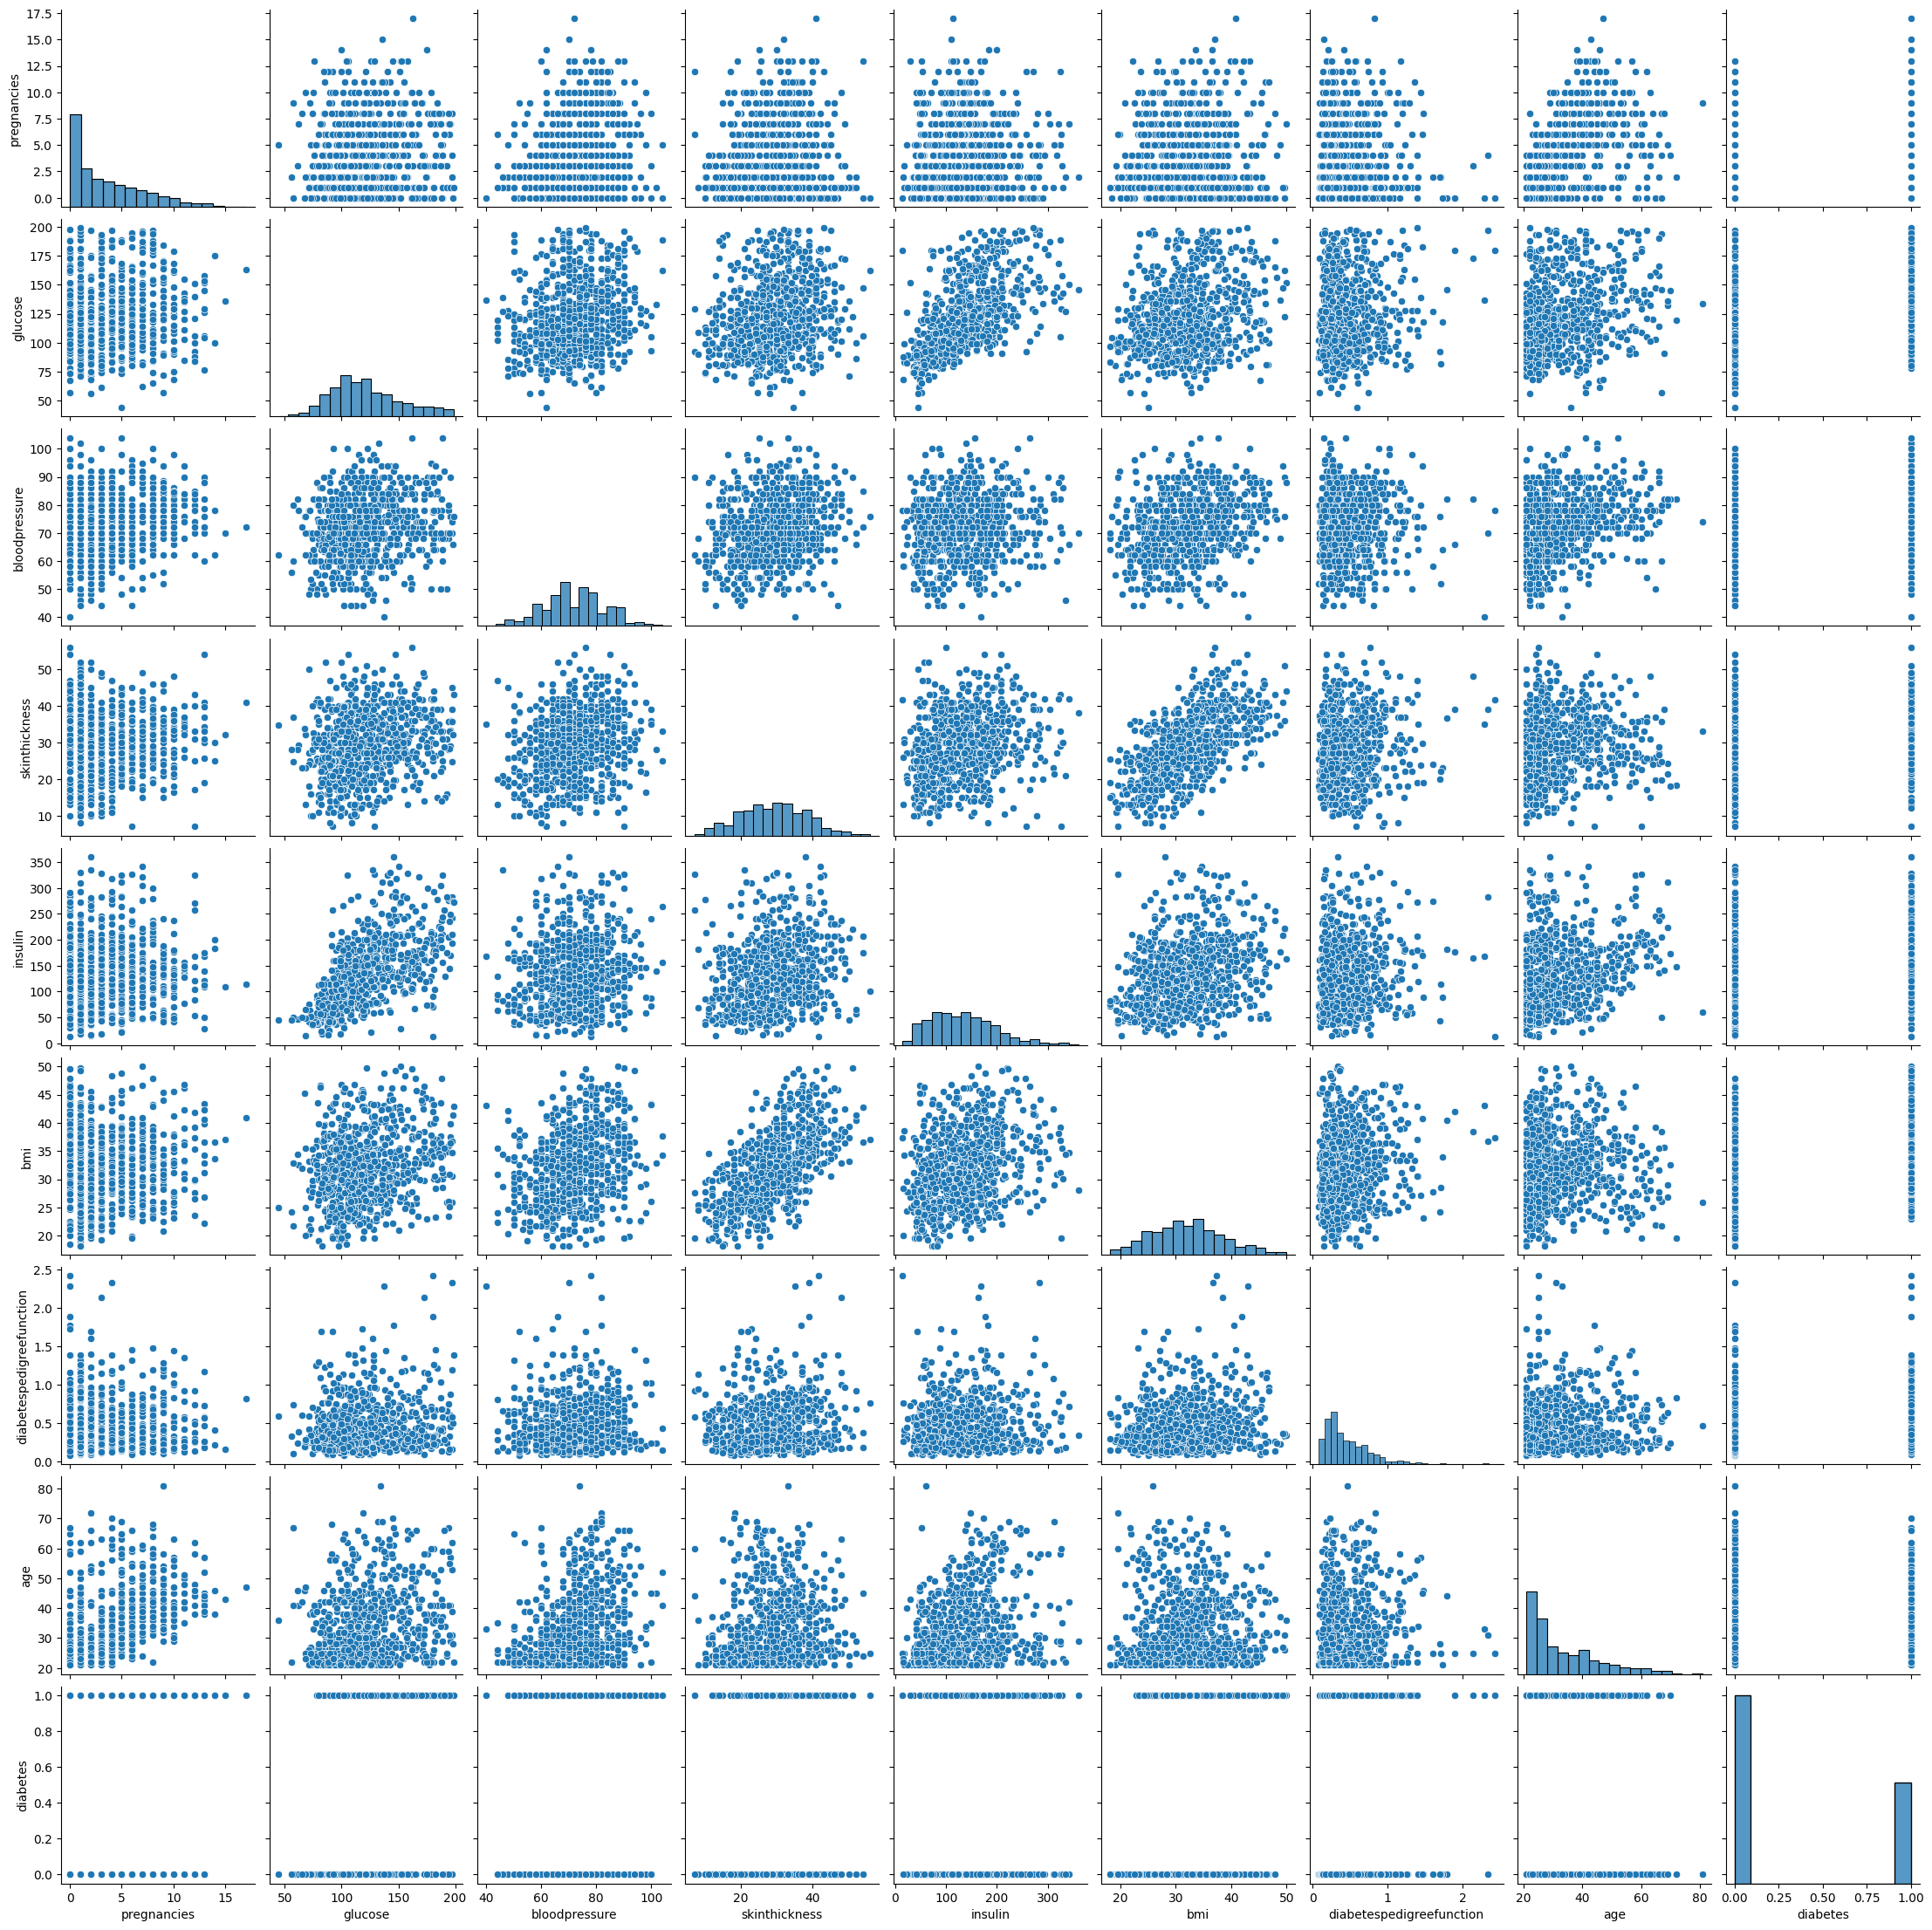

In [11]:
sns.pairplot(data_clean)
plt.show()

### Skewness and Kurtosis
Even though the data is cleaned, the data still exhibits some non normality that may cause errors when we do our statistical calculations. Here I will try to fix the non normality.

Analyzing current features for skewness and kurtosis

| Feature                  | Skewness | Kurtosis | Skewness Description    | Tail Description           |
|--------------------------|----------|----------|-------------------------|----------------------------|
| Pregnancies              | 0.9017   | 0.1592   | Right skewed            | Approximately normal tails |
| Glucose                  | 0.5308   | -0.2786  | Right skewed            | Approximately normal tails |
| BloodPressure            | 0.0224   | -0.1969  | Approximately symmetric | Approximately normal tails |
| SkinThickness            | 0.0641   | -0.4038  | Approximately symmetric | Light tailed               |
| Insulin                  | 0.6582   | 0.2069   | Right skewed            | Approximately normal tails |
| BMI                      | 0.2637   | -0.3649  | Approximately symmetric | Light tailed               |
| DiabetesPedigreeFunction | 1.9199   | 5.5950   | Right skewed            | Fat tailed                 |
| Age                      | 1.1296   | 0.6432   | Right skewed            | Fat tailed                 |
| Diabetes                 | 0.6350   | -1.6009  | Right skewed            | Light tailed               |

### Transforming Skewed features
Insulin and DPedigreeFunction are heavily right skewed. I want to transform them to be approximately normal.

I am leaving the other features alone for now because they are hard to transform

In [12]:
# Loop over each column in the DataFrame
for col in data_clean.select_dtypes(include='number').columns:
    skewness = data_clean[col].skew()    # Third moment: skewness
    kurtosis = data_clean[col].kurt()    # Fourth moment: kurtosis
    print(f"Feature: {col}")
    print(f"  Skewness: {skewness:.4f}")
    print(f"  Kurtosis: {kurtosis:.4f}")
    print("-" * 40)


Feature: pregnancies
  Skewness: 0.9017
  Kurtosis: 0.1592
----------------------------------------
Feature: glucose
  Skewness: 0.5308
  Kurtosis: -0.2786
----------------------------------------
Feature: bloodpressure
  Skewness: 0.0224
  Kurtosis: -0.1969
----------------------------------------
Feature: skinthickness
  Skewness: 0.0641
  Kurtosis: -0.4038
----------------------------------------
Feature: insulin
  Skewness: 0.6582
  Kurtosis: 0.2069
----------------------------------------
Feature: bmi
  Skewness: 0.2637
  Kurtosis: -0.3649
----------------------------------------
Feature: diabetespedigreefunction
  Skewness: 1.9199
  Kurtosis: 5.5950
----------------------------------------
Feature: age
  Skewness: 1.1296
  Kurtosis: 0.6432
----------------------------------------
Feature: diabetes
  Skewness: 0.6350
  Kurtosis: -1.6009
----------------------------------------


#### Transforming Skewed features
Insulin and DPedigreeFunction are heavily right skewed. I want to transform them to be approximately normal.

I am leaving the other features alone for now because they are hard to transform

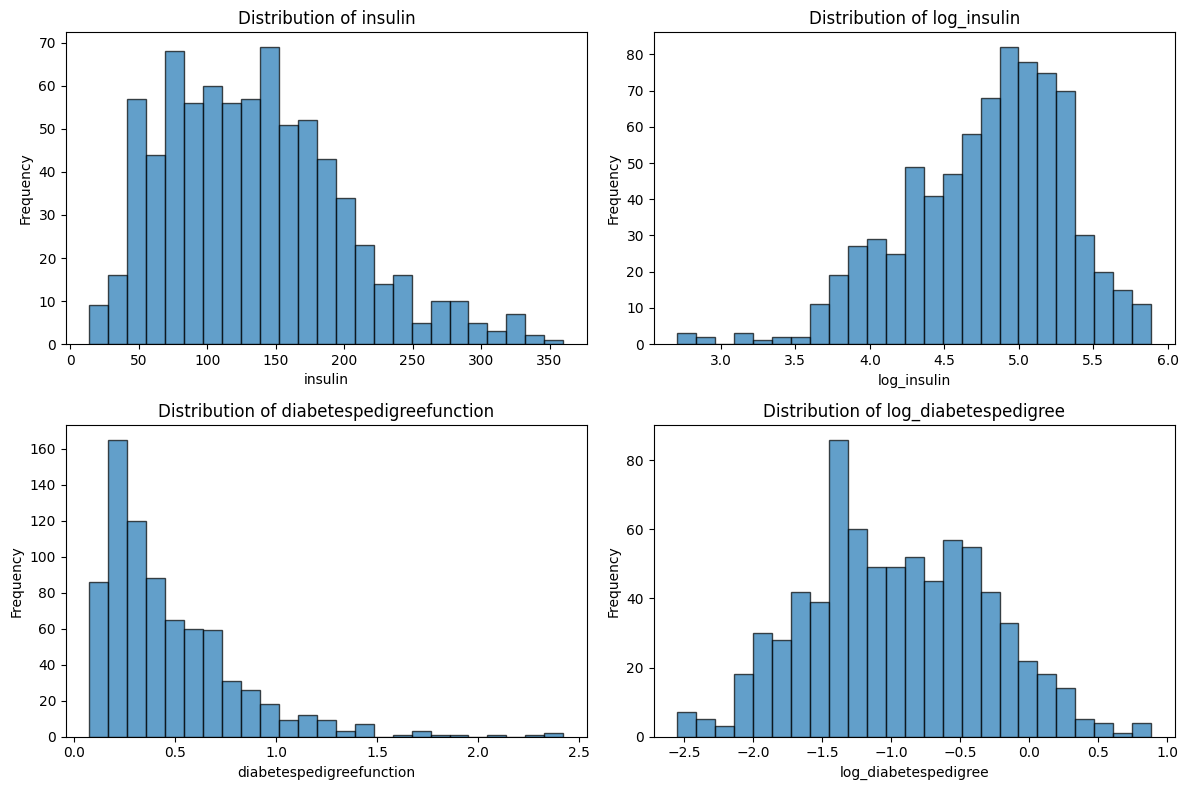

In [13]:
# Plotting distributions before transformation
features = ['insulin','diabetespedigreefunction']

data_clean['log_insulin'] = np.log1p(data_clean['insulin'])

data_clean['log_diabetespedigree'] = np.log(data_clean['diabetespedigreefunction'])

features_to_plot = ['insulin', 'log_insulin', 'diabetespedigreefunction', 'log_diabetespedigree']

# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Loop through features and plot each on a separate subplot
for i, feature in enumerate(features_to_plot):
    axes[i].hist(data_clean[feature], bins=25, edgecolor='k', alpha=0.7)
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

# Adjust layout so subplots don't overlap
plt.tight_layout()
plt.show()

### Observing distribution differences between diabetic and nondiabetic

In [14]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = data_clean['diabetes'].map(lambda x: color_wheel.get(x + 1))
print(data_clean.diabetes.value_counts())

diabetes
0.0    500
1.0    268
Name: count, dtype: int64


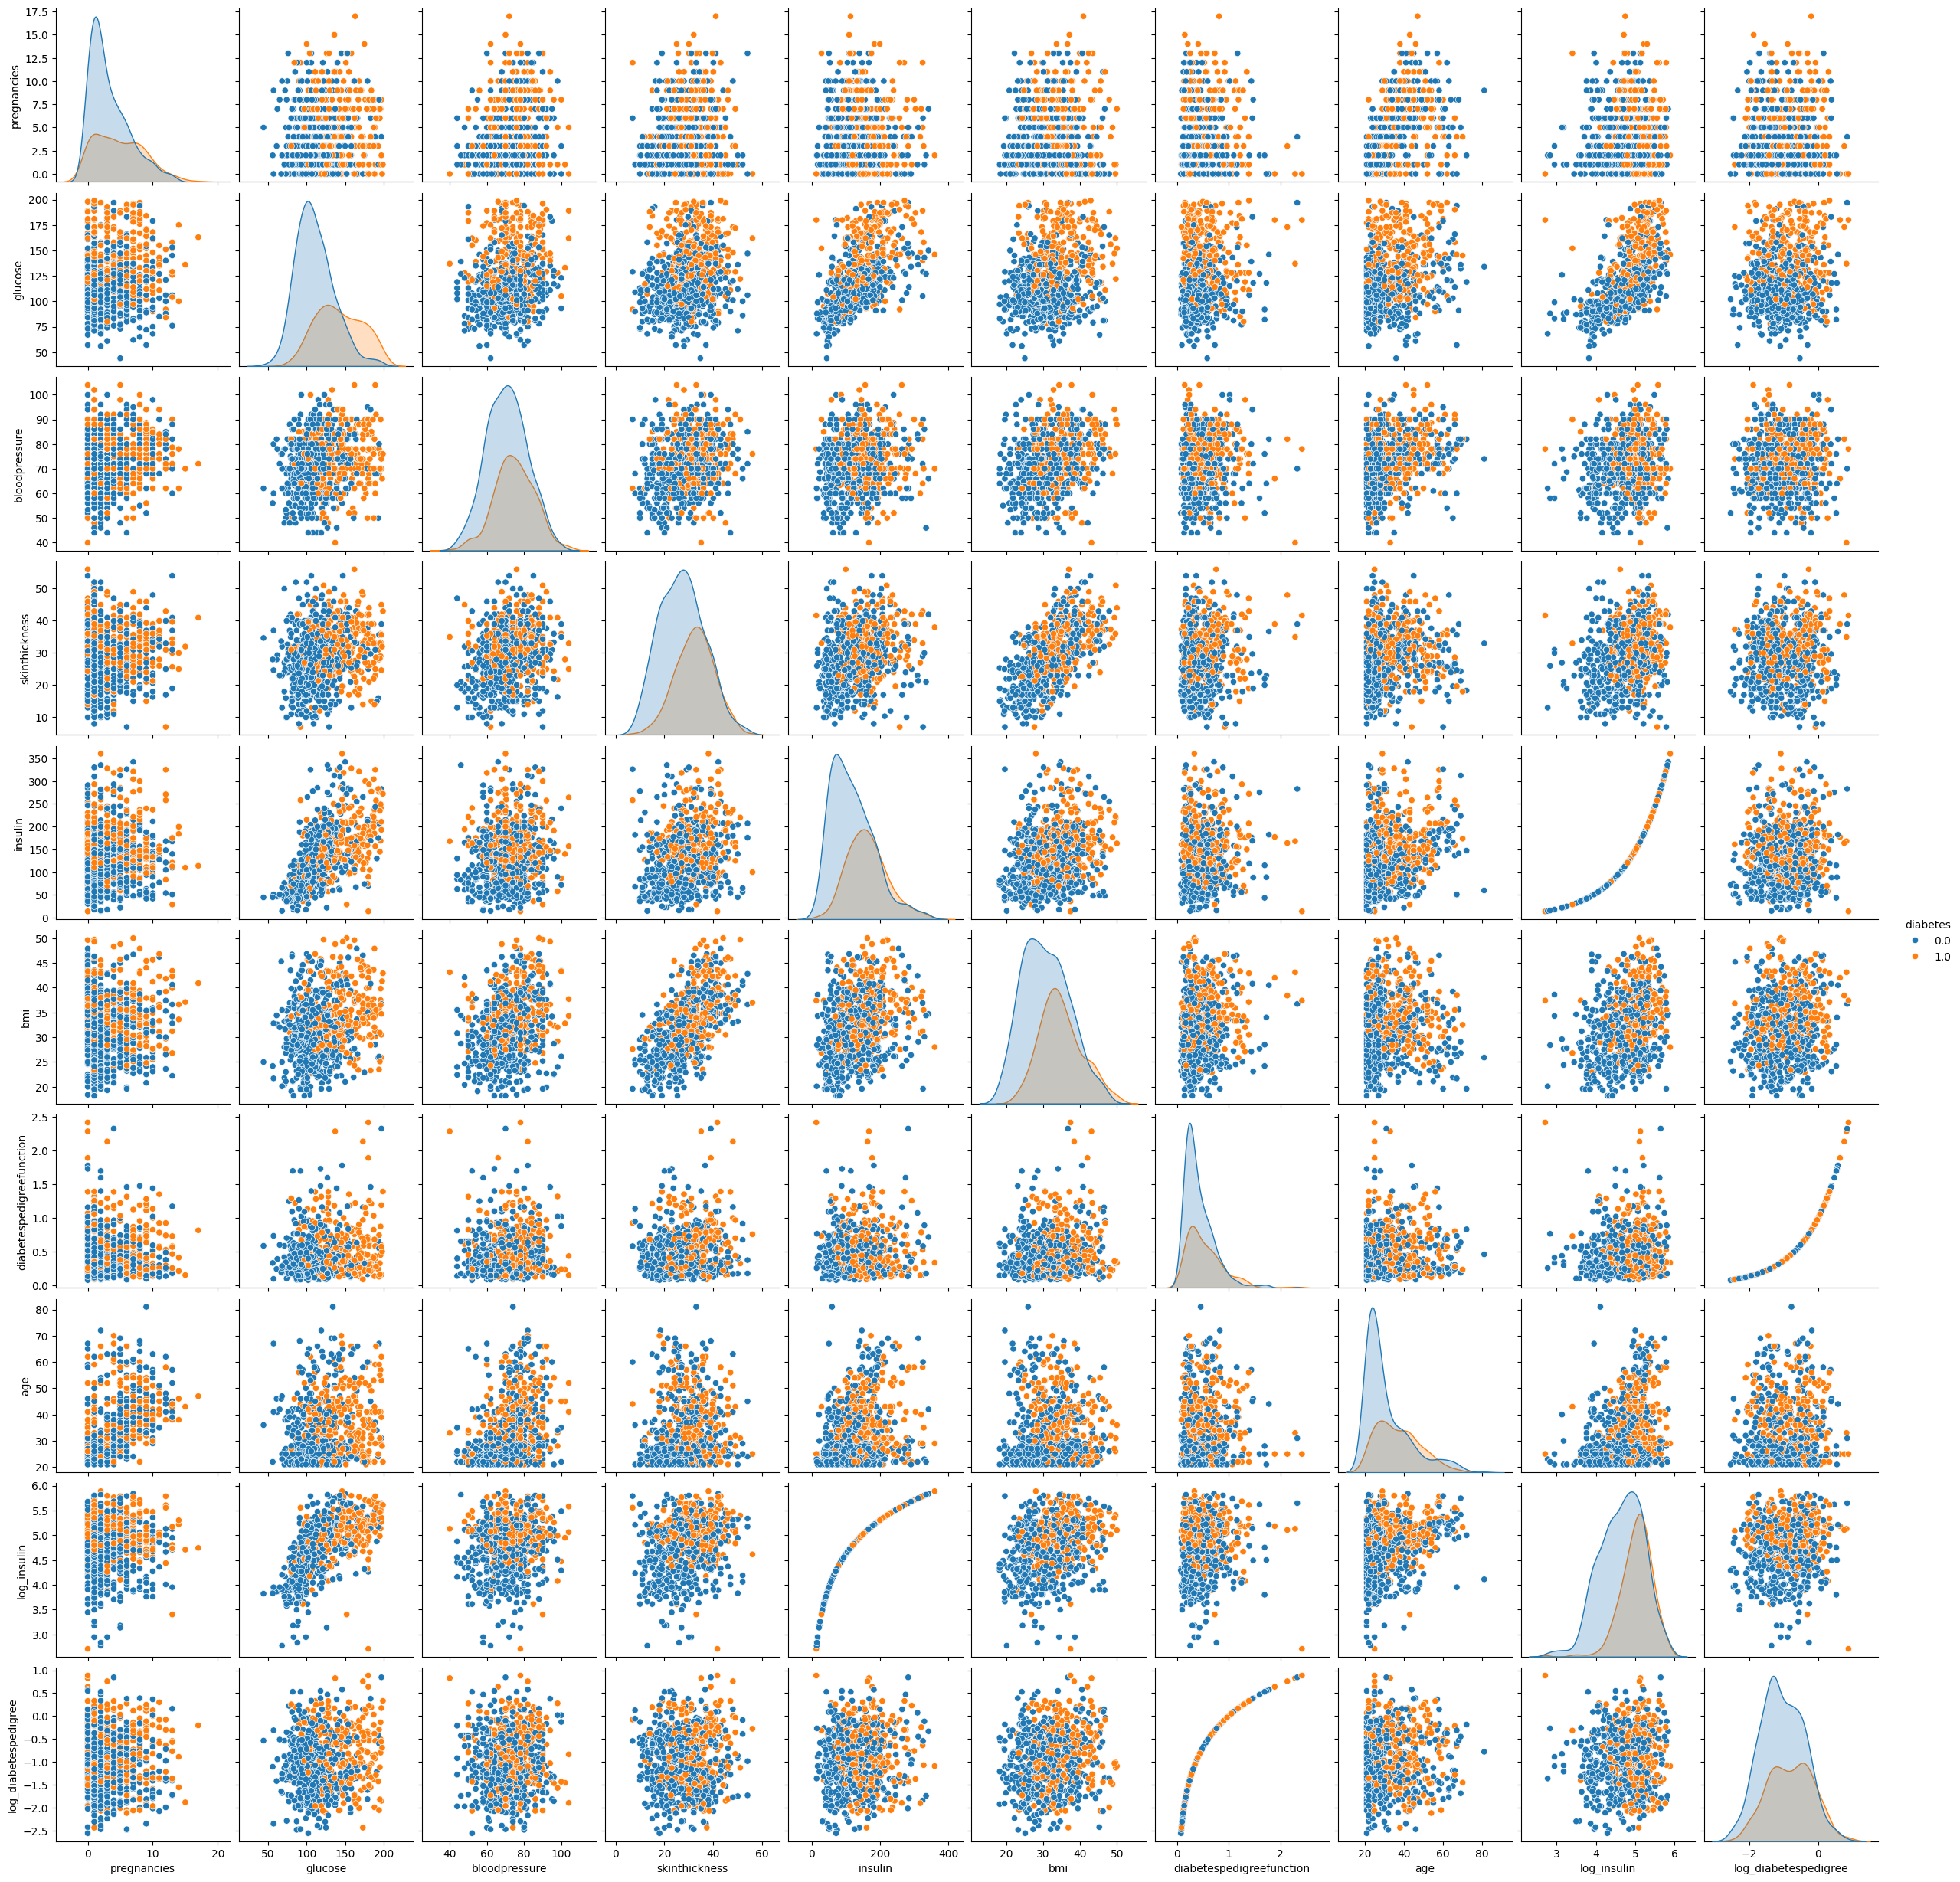

In [15]:
p=sns.pairplot(data_clean, hue = 'diabetes')

### **Feature Engineering**
I want to create meaningful metrics to capture the relationships within this dataset.

BMI X AGE
- Multiplying BMI by Age might capture the combined effect of weight and aging on diabetes risk.

Glucose / Insulin
- The relationship between glucose and insulin levels may provide insights into metabolic health.

Glucose X BMI
- Captures how high glucose levels in the context of high BMI may interact to increase risk.

In [16]:
# Create a new column for BMI X AGE: captures the combined effect of BMI and age.
data_clean['BMI X AGE'] = data_clean['bmi'] * data_clean['age']

# Create a new column for Glucose/Insulin.
data_clean['Glucose/Insulin'] = data_clean['glucose'] / data_clean['insulin']

# Create a new column for Glucose X BMI: captures how high glucose levels in the context of high BMI may interact.
data_clean['Glucose X BMI'] = data_clean['glucose'] * data_clean['bmi']

data_clean[['BMI X AGE', 'Glucose/Insulin', 'Glucose X BMI']].head()

BMI X AGE  Glucose/Insulin  Glucose X BMI
0     1680.0         1.180851         4972.8
1      824.6         1.275000         2261.0
2      745.6         0.938462         4263.9
3      590.1         0.946809         2500.9
4     1422.3         0.815476         5904.7

## Answering the Questions

The most important thing we learned was that blood glucose seems to have the strongest relationship with diabetes. Because the body is an interconnected system, other features such as BP, insulin, age and BMI are correlated with diabetes. 

We can also conclude that differences in features between diabetic and non diabetic people are statistically significant meaning, differences in BP, blood glucose etc. are significanytly different from the two groups althought marginally.


#### separating diabetic from non-diabetic

In [17]:
# Create DataFrame for diabetics (where 'diabetes' equals 1)
df_diabetics = data_clean[data_clean['diabetes'] == 1]

# Create DataFrame for non-diabetics (where 'diabetes' equals 0)
df_non_diabetics = data_clean[data_clean['diabetes'] == 0]

# Display the first few rows of each DataFrame to verify
print("Diabetics DataFrame:")
print(df_diabetics.head())

print("\nNon-Diabetics DataFrame:")
print(df_non_diabetics.head())

Diabetics DataFrame:
   pregnancies  glucose  bloodpressure  skinthickness     insulin   bmi  \
0          6.0    148.0           72.0      35.000000  125.333333  33.6   
2          8.0    183.0           64.0      26.333333  195.000000  23.3   
4          0.0    137.0           40.0      35.000000  168.000000  43.1   
6          3.0     78.0           50.0      32.000000   88.000000  31.0   
8          2.0    197.0           70.0      45.000000  243.000000  30.5   

   diabetespedigreefunction   age  diabetes  log_insulin  \
0                     0.627  50.0       1.0     4.838924   
2                     0.672  32.0       1.0     5.278115   
4                     2.288  33.0       1.0     5.129899   
6                     0.248  26.0       1.0     4.488636   
8                     0.158  53.0       1.0     5.497168   

   log_diabetespedigree  BMI X AGE  Glucose/Insulin  Glucose X BMI  
0             -0.466809     1680.0         1.180851         4972.8  
2             -0.397497      

#### summary statistics of two groups

In [18]:
df_diabetics.describe()

pregnancies     glucose  bloodpressure  skinthickness     insulin  \
count   268.000000  268.000000     268.000000     268.000000  268.000000   
mean      4.865672  142.262438      74.725124      32.388060  163.099502   
std       3.741239   29.503640      10.762575       7.929957   59.530093   
min       0.000000   78.000000      40.000000       7.000000   14.000000   
25%       1.750000  119.000000      68.000000      27.000000  121.250000   
50%       4.000000  140.000000      74.000000      32.666667  158.500000   
75%       8.000000  167.000000      82.000000      37.416667  197.416667   
max      17.000000  199.000000     104.000000      56.000000  360.000000   

              bmi  diabetespedigreefunction         age  diabetes  \
count  268.000000                268.000000  268.000000     268.0   
mean    34.845025                  0.550500   37.067164       1.0   
std      5.737725                  0.372354   10.968254       0.0   
min     22.900000                  0.088000   21.000000       1.0   
25%     30.800000                  0.262500   28.000000       1.0   
50%     34.166667                  0.449000   36.000000       1.0   
75%     38.200000                  0.728000   44.000000       1.0   
max     50.000000                  2.420000   70.000000       1.0   

       log_insulin  log_diabetespedigree    BMI X AGE  Glucose/Insulin  \
count   268.000000            268.000000   268.000000       268.000000   
mean      5.027477             -0.801091  1282.628731         1.013208   
std       0.407205              0.644961   406.064042         0.839319   
min       2.708050             -2.430418   526.700000         0.356589   
25%       4.806067             -1.337510   941.600000         0.728551   
50%       5.072043             -0.800742  1230.900000         0.915867   
75%       5.290369             -0.317457  1539.425000         1.101032   
max       5.888878              0.883768  2579.500000        12.857143   

       Glucose X BMI  
count     268.000000  
mean     4973.822388  
std      1383.422219  
min      2418.000000  
25%      3903.550000  
50%      4887.200000  
75%      5967.600000  
max      9005.200000

In [19]:
df_non_diabetics.describe()

pregnancies     glucose  bloodpressure  skinthickness     insulin  \
count   500.000000  500.000000     500.000000     500.000000  500.000000   
mean      3.298000  110.474667      70.691333      27.214000  119.502667   
std       3.017185   24.799127      10.966135       9.166717   63.483745   
min       0.000000   44.000000      44.000000       7.000000   15.000000   
25%       1.000000   93.000000      62.000000      20.000000   70.916667   
50%       2.000000  107.000000      70.000000      27.000000  108.000000   
75%       5.000000  125.000000      78.000000      33.000000  158.000000   
max      13.000000  197.000000     100.000000      54.000000  342.000000   

              bmi  diabetespedigreefunction         age  diabetes  \
count  500.000000                500.000000  500.000000     500.0   
mean    30.743600                  0.429734   31.190000       0.0   
std      6.342785                  0.299085   11.667655       0.0   
min     18.200000                  0.078000   21.000000       0.0   
25%     25.600000                  0.229750   23.000000       0.0   
50%     30.100000                  0.336000   27.000000       0.0   
75%     35.225000                  0.561750   37.000000       0.0   
max     47.900000                  2.329000   81.000000       0.0   

       log_insulin  log_diabetespedigree    BMI X AGE  Glucose/Insulin  \
count   500.000000            500.000000   500.000000       500.000000   
mean      4.648436             -1.045083   961.145133         1.165953   
std       0.554947              0.628271   408.938491         0.653198   
min       2.772589             -2.551046   382.200000         0.323077   
25%       4.275506             -1.470765   646.800000         0.753549   
50%       4.691348             -1.090644   858.750000         1.032304   
75%       5.068904             -0.576701  1152.275000         1.344287   
max       5.837730              0.845439  2697.000000         5.727273   

       Glucose X BMI  
count     500.000000  
mean     3414.337000  
std      1115.846398  
min      1100.000000  
25%      2551.875000  
50%      3238.000000  
75%      4040.700000  
max      8044.500000

#### t-test for independence

In [20]:
import scipy.stats as stats

# List all columns and remove the 'diabetes' column as it's our grouping variable.
features_to_test = [col for col in data_clean.columns if col != 'diabetes']

# Prepare a list to collect the test results.
results = []

# Loop over each feature and perform an independent t-test between diabetics and non-diabetics.
for feature in features_to_test:
    t_stat, p_value = stats.ttest_ind(df_diabetics[feature], df_non_diabetics[feature], nan_policy='omit')
    results.append({
        'Feature': feature,
        't_statistic': t_stat,
        'p_value': round(p_value, 4)  # Round p_value to 3 decimal places
    })

# Convert the results into a DataFrame.
results_df = pd.DataFrame(results)

# Display the resulting DataFrame.
print(results_df)

                     Feature  t_statistic  p_value
0                pregnancies     6.298431   0.0000
1                    glucose    15.824576   0.0000
2              bloodpressure     4.890277   0.0000
3              skinthickness     7.805902   0.0000
4                    insulin     9.268212   0.0000
5                        bmi     8.825375   0.0000
6   diabetespedigreefunction     4.885826   0.0000
7                        age     6.792688   0.0000
8                log_insulin     9.849101   0.0000
9       log_diabetespedigree     5.082338   0.0000
10                 BMI X AGE    10.409636   0.0000
11           Glucose/Insulin    -2.788569   0.0054
12             Glucose X BMI    16.942776   0.0000


#### Visualizing difference in means

#### Analyzing the effect of pregnancies with other variables
From the three graphs, pregnancy doesn't seem to be a significant factor for diabetes or any other factor

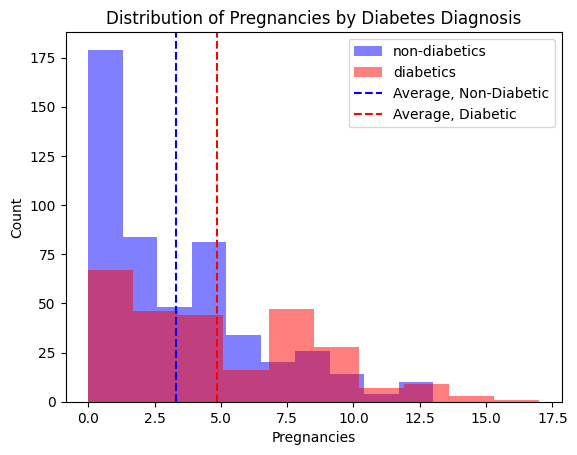

In [21]:
# first histogram
plt.hist(data.loc[data_clean['diabetes'] == 0, 'pregnancies'], color='blue', alpha=0.5, label='non-diabetics')
plt.hist(data.loc[data_clean['diabetes'] == 1, 'pregnancies'], color='red', alpha=0.5, label='diabetics')
plt.title('Distribution of Pregnancies by Diabetes Diagnosis')
plt.xlabel('Pregnancies')
plt.ylabel('Count')
plt.axvline(data.loc[data_clean['diabetes'] == 0, 'pregnancies'].mean(), color='blue', linestyle='dashed', label='Average, Non-Diabetic')
plt.axvline(data.loc[data_clean['diabetes'] == 1, 'pregnancies'].mean(), color='red', linestyle='dashed', label='Average, Diabetic')
plt.legend();

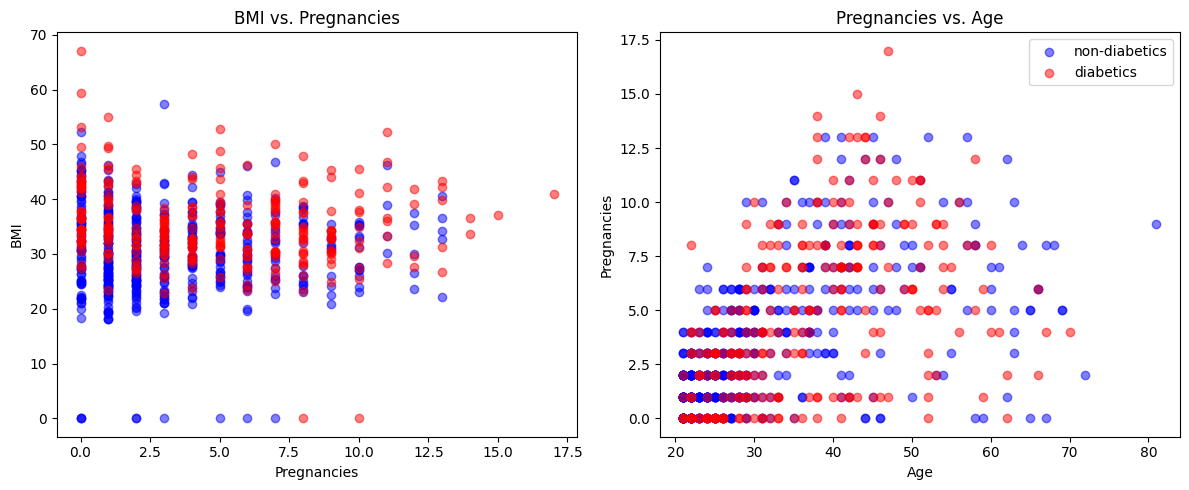

In [22]:
# here are two scatterplots to investigate the questions from the histogram summary
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
ax[0].scatter(x=data.loc[data['diabetes'] == 0, 'pregnancies'], y=data.loc[data['diabetes'] == 0, 'bmi'], color='blue', alpha=0.5, label='non-diabetics')
ax[0].scatter(x=data.loc[data['diabetes'] == 1, 'pregnancies'], y=data.loc[data['diabetes'] == 1, 'bmi'], color='red', alpha=0.5, label='diabetics')
ax[0].set_title('BMI vs. Pregnancies')
ax[0].set_xlabel('Pregnancies')
ax[0].set_ylabel('BMI')

ax[1].scatter(x=data.loc[data['diabetes'] == 0, 'age'], y=data.loc[data['diabetes'] == 0, 'pregnancies'], color='blue', alpha=0.5, label='non-diabetics')
ax[1].scatter(x=data.loc[data['diabetes'] == 1, 'age'], y=data.loc[data['diabetes'] == 1, 'pregnancies'], color='red', alpha=0.5, label='diabetics')
ax[1].set_title('Pregnancies vs. Age')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Pregnancies')
ax[1].legend()
fig.tight_layout();

#### Relationships of other features

From these graphs we can see that:
1. High glucose is very correlated with diabetes
    - this makes sense because diabetes is the inability to control blood sugar
1. High BP, Skin Thickness, Insulin and BMI are also indicative of diabetes
    - high insulin indicates type 2 diabetes where insulin fails to facilitate glucose uptake in the cells
    - high BP, Skin Thickness, BMI are indicators of insulin resistance

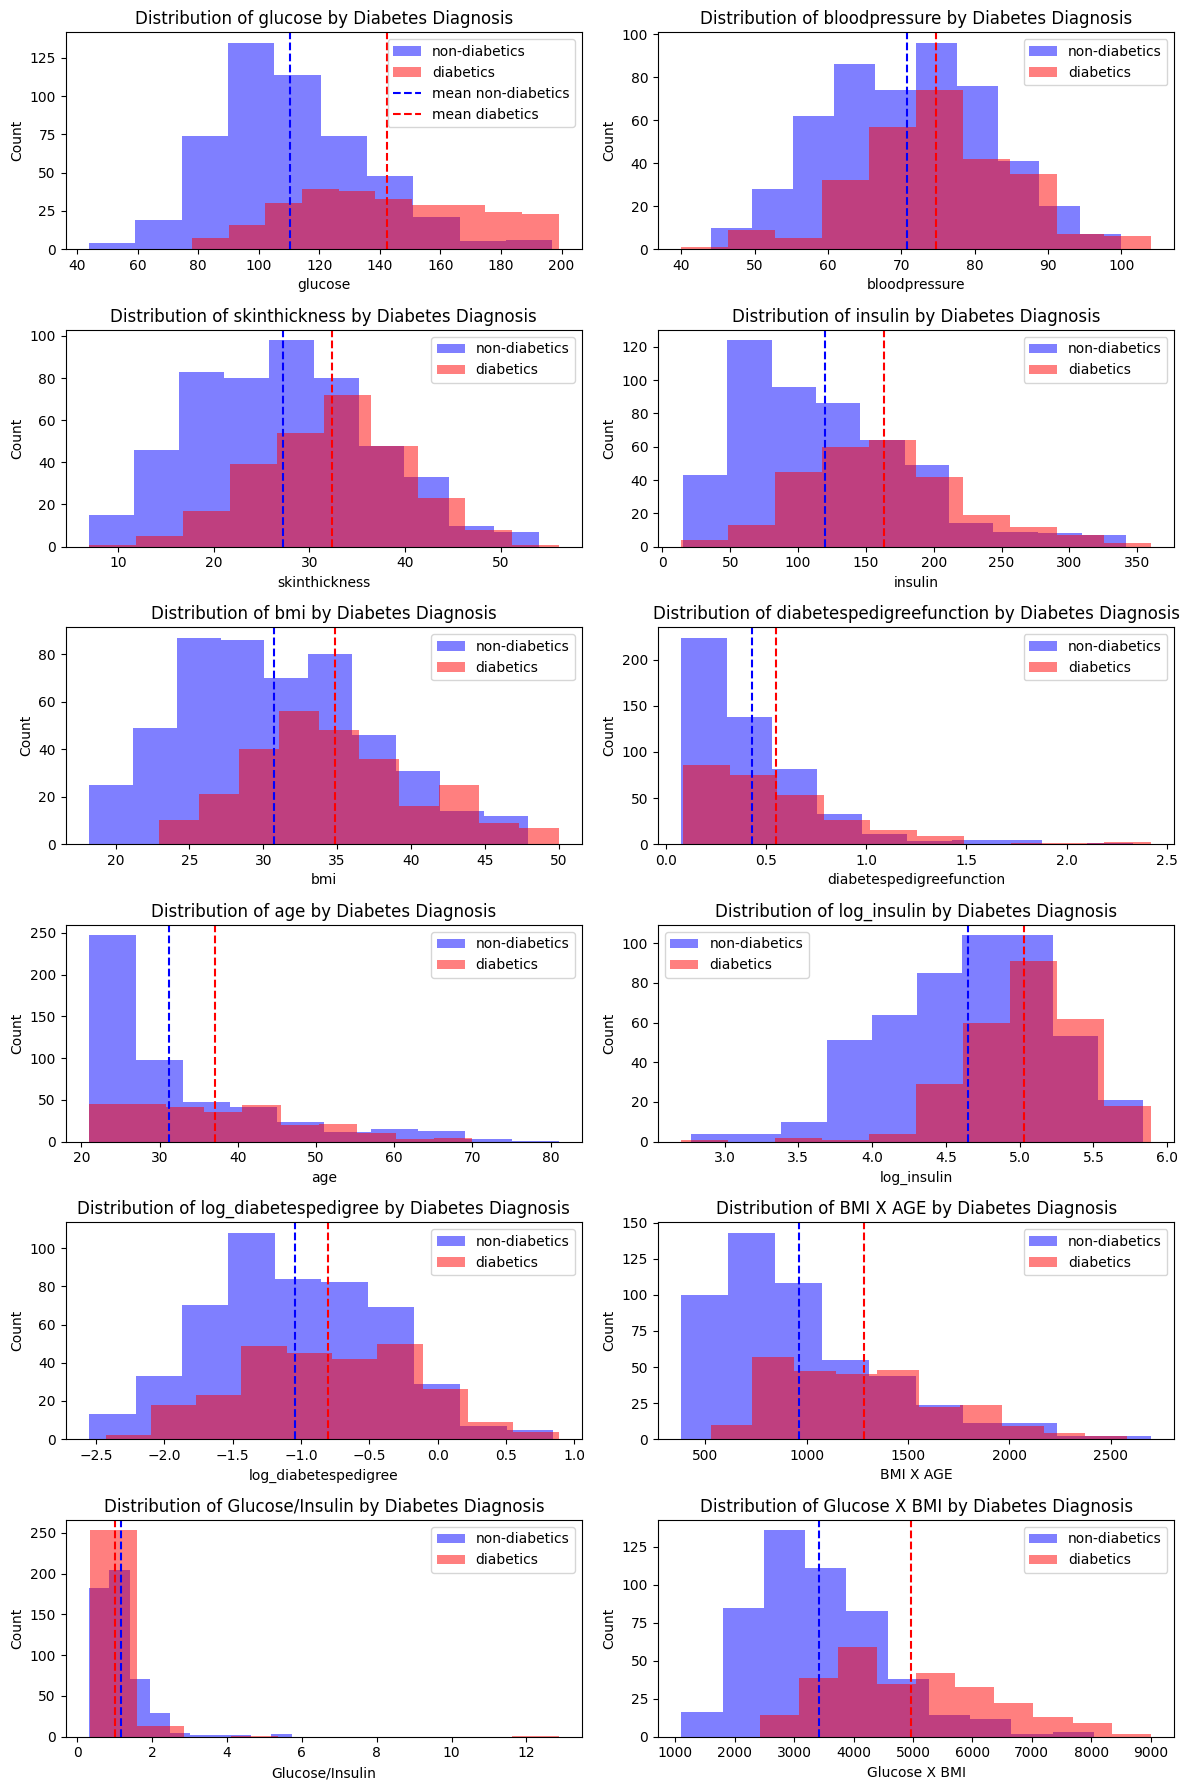

In [23]:
# Determine the features to plot (excluding 'diabetes' and 'pregnancies')
features = [col for col in data_clean.columns if col not in ['diabetes', 'pregnancies']]

# Calculate the number of rows based on the number of features and fixed 2 columns.
n_features = len(features)
ncols = 2
nrows = (n_features + 1) // ncols  # round up if needed

fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, nrows * 3))
ax = ax.flatten()  # Flatten the 2D array of axes for easier iteration

for i, col in enumerate(features):
    # Plot histogram for non-diabetics (blue) and diabetics (red)
    ax[i].hist(data_clean.loc[data_clean['diabetes'] == 0, col],
               color='blue', alpha=0.5, label='non-diabetics')
    ax[i].hist(data_clean.loc[data_clean['diabetes'] == 1, col],
               color='red', alpha=0.5, label='diabetics')
    
    # Plot vertical lines at the mean for each group
    mean_non_diab = data_clean.loc[data_clean['diabetes'] == 0, col].mean()
    mean_diab = data_clean.loc[data_clean['diabetes'] == 1, col].mean()
    ax[i].axvline(mean_non_diab, color='blue', linestyle='dashed', label='mean non-diabetics' if i == 0 else "")
    ax[i].axvline(mean_diab, color='red', linestyle='dashed', label='mean diabetics' if i == 0 else "")
    
    ax[i].set_title(f'Distribution of {col} by Diabetes Diagnosis')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Count')
    ax[i].legend()

# Turn off any unused subplots
for j in range(i+1, len(ax)):
    ax[j].axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.tight_layout()
plt.show()

# Prediction Using ML

#### Scaling for ML

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data_clean.drop(["diabetes"],axis = 1),),
        columns=['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'log_insulin', 'log_diabetespedigree', 'BMI X AGE', 'Glucose/Insulin', 'Glucose X BMI'])

In [25]:
y = data_clean.diabetes

## KNN Classifier

### Setting it up

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [27]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [28]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [29]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


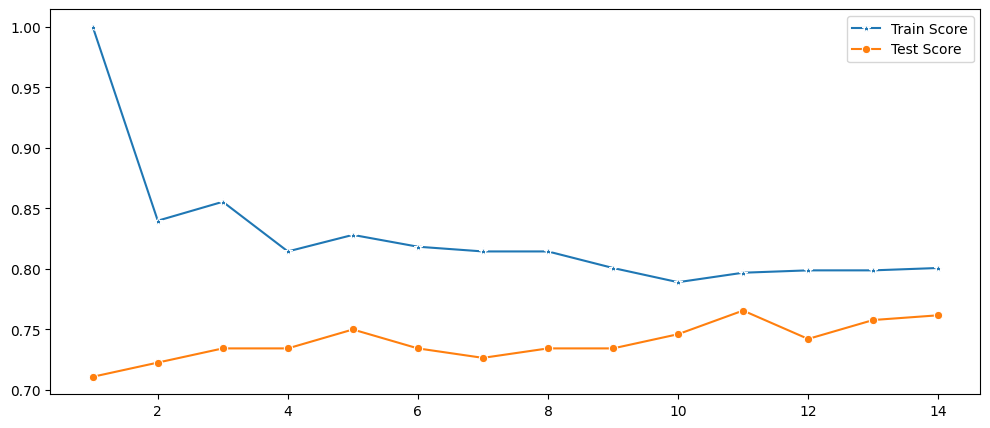

In [35]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')
plt.show()

In [31]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

### Model Performance Analysis

#### Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted  0.0  1.0  All
True                    
0.0        146   21  167
1.0         39   50   89
All        185   71  256

Text(0.5, 23.52222222222222, 'Predicted label')

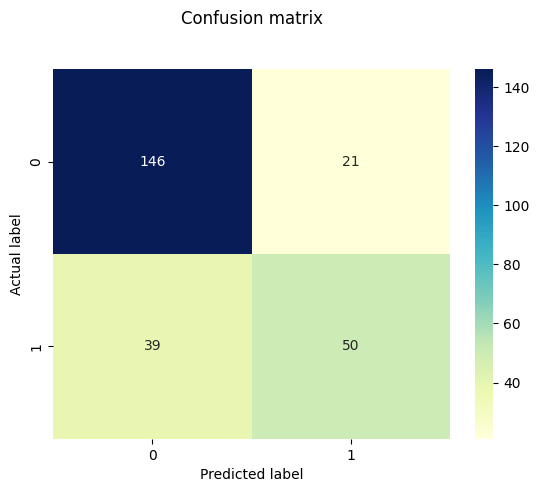

In [43]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       167
         1.0       0.70      0.56      0.62        89

    accuracy                           0.77       256
   macro avg       0.75      0.72      0.73       256
weighted avg       0.76      0.77      0.76       256



#### Classification Report

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       167
         1.0       0.70      0.56      0.62        89

    accuracy                           0.77       256
   macro avg       0.75      0.72      0.73       256
weighted avg       0.76      0.77      0.76       256



#### ROC - AUC

In [46]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

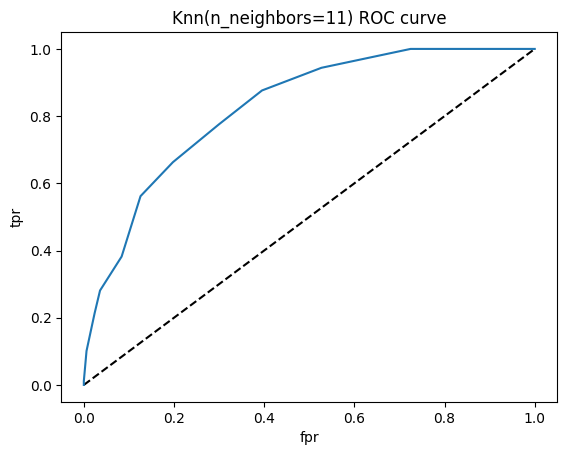

In [47]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [48]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8255062907892081